# Speed Chart

# Throughput

In [2]:
#  brew install graphviz
from graphviz import Digraph

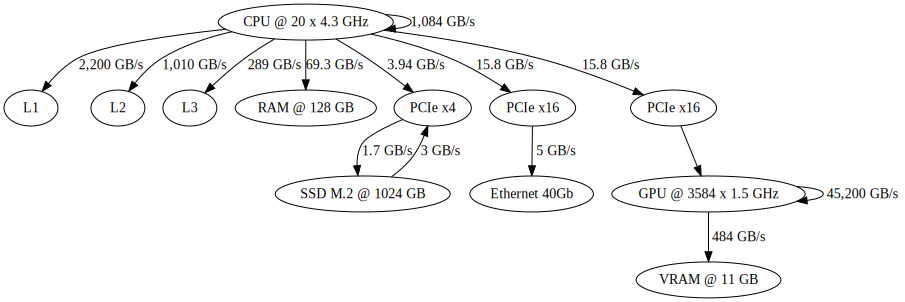

In [12]:
dot = Digraph(comment='Throughput')
# dot.engine = 'neato'

# interesting realworld numbers: https://asteroidsathome.net/boinc/cpu_list.php
# http://www.sisoftware.eu/2017/06/23/intel-core-i9-skl-x-review-and-benchmarks-cpu-avx512-is-here/
# Intel i9 7900X - FP32 @ 271 GFLOPS, multiply by four => 1084 GB/s
dot.node('CPU', 'CPU @ 20 x 4.3 GHz')
dot.edge('CPU', 'CPU', label='1,084 GB/s')

# http://www.sisoftware.eu/2017/06/24/intel-core-i9-skl-x-review-and-benchmarks-cache-memory-performance/
dot.node('L1', 'L1') # @ 320 kB I + 320 kB D
dot.edge('CPU', 'L1', label='2,200 GB/s')
dot.node('L2', 'L2') # @ 10MB
dot.edge('CPU', 'L2', label='1,010 GB/s')
dot.node('L3', 'L3') #  @ 13.75MB
dot.edge('CPU', 'L3', label=' 289 GB/s')

dot.node('RAM', 'RAM @ 128 GB')
dot.edge('CPU', 'RAM', label='69.3 GB/s')


# https://en.wikipedia.org/wiki/PCI_Express
dot.node('PCIe1', 'PCIe x4')
dot.node('PCIe2', 'PCIe x16')
dot.node('PCIe3', 'PCIe x16')

dot.edge('CPU', 'PCIe1', label=' 3.94 GB/s')
dot.edge('CPU', 'PCIe2', label='15.8 GB/s')
dot.edge('CPU', 'PCIe3', label='15.8 GB/s')

# Samsung 1TB PM961 Single Sided 80mm (2280/2280SS) M.2 PCI Express 3.0 x4 (PCIe Gen3 x4) OEM NVMe SSD - MZVLW1T0HMLH
dot.node('NVMe', 'SSD M.2 @ 1024 GB')
# note read = 3,000 GB/s
dot.edge('PCIe1', 'NVMe', label='1.7 GB/s')
dot.edge('NVMe', 'PCIe1', label='3 GB/s')

# (Mellanox MHQH19B-XTR)
dot.node('ETH1', 'Ethernet 40Gb')

dot.edge('PCIe2', 'ETH1', label='  5 GB/s')

dot.node('GPU', 'GPU @ 3584 x 1.5 GHz')

# 11.3 TFLOPs multiply by four to get bytes per second => 45.2 T bytes/s 
dot.edge('GPU', 'GPU', label='  45,200 GB/s')

dot.node('VRAM', 'VRAM @ 11 GB') # (GDDR5X)
dot.edge('PCIe3', 'GPU')
dot.edge('GPU', 'VRAM', label='  484 GB/s')

dot